# Â∞àÊ°à‚Ω¨ÁõÆÊ®ôÔºö  
‰ªªÈÅ∏  Cupoy  Êñ∞ËÅûÊúçÂãô‰πãÊüê‚ºÄ‰∏ÄÁ®ÆÂàÜÈ°û  ( Â¶ÇÁÜ±‚æ®ÈñÄÊñ∞ËÅû„ÄÅÁßëÊäÄ„ÄÅÂïÜÊ•≠ ....) Ôºå‰Ωø‚Ω§Áî®‰Ω†Â≠∏ÁøíÈÅéÁöÑÁà¨Ëü≤Á®ãÂºèÔºåÁà¨ÂèñÂâç  500  ÁØáÁöÑ‚ΩÇÊñáÁ´†Ôºö  
https://www.cupoy.com/newsfeed/topicgrp/tech_tw  


# Âü∫Êú¨‚Ω¨ÁõÆÊ®ô  
## Target 1  
ÈÄèÈÅéÈñãÁôºËÄÖ‚ºØÂ∑•ÂÖ∑ËßÄÂØüÁ∂≤Á´ôÂ±¨Êñº<font color=blue>ÂãïÊÖãÁ∂≤Á´ô</font>ÔºåÂõ†ÁÇ∫‰∏ãÊªëÊªëÈº†ÊàñÊåâ scroll bar Âêë‰∏ãÊç≤È†ÅÊôÇÔºårequests ÁöÑÊï∏Èáè‰∏çÂÅúÂ¢ûÂä†ÔºåÁî±Ê≠§ÂèØÁü•Ê≠§Á∂≤È†ÅÂ±¨ÊñºÂãïÊÖãÁ∂≤Á´ô„ÄÇ  
  
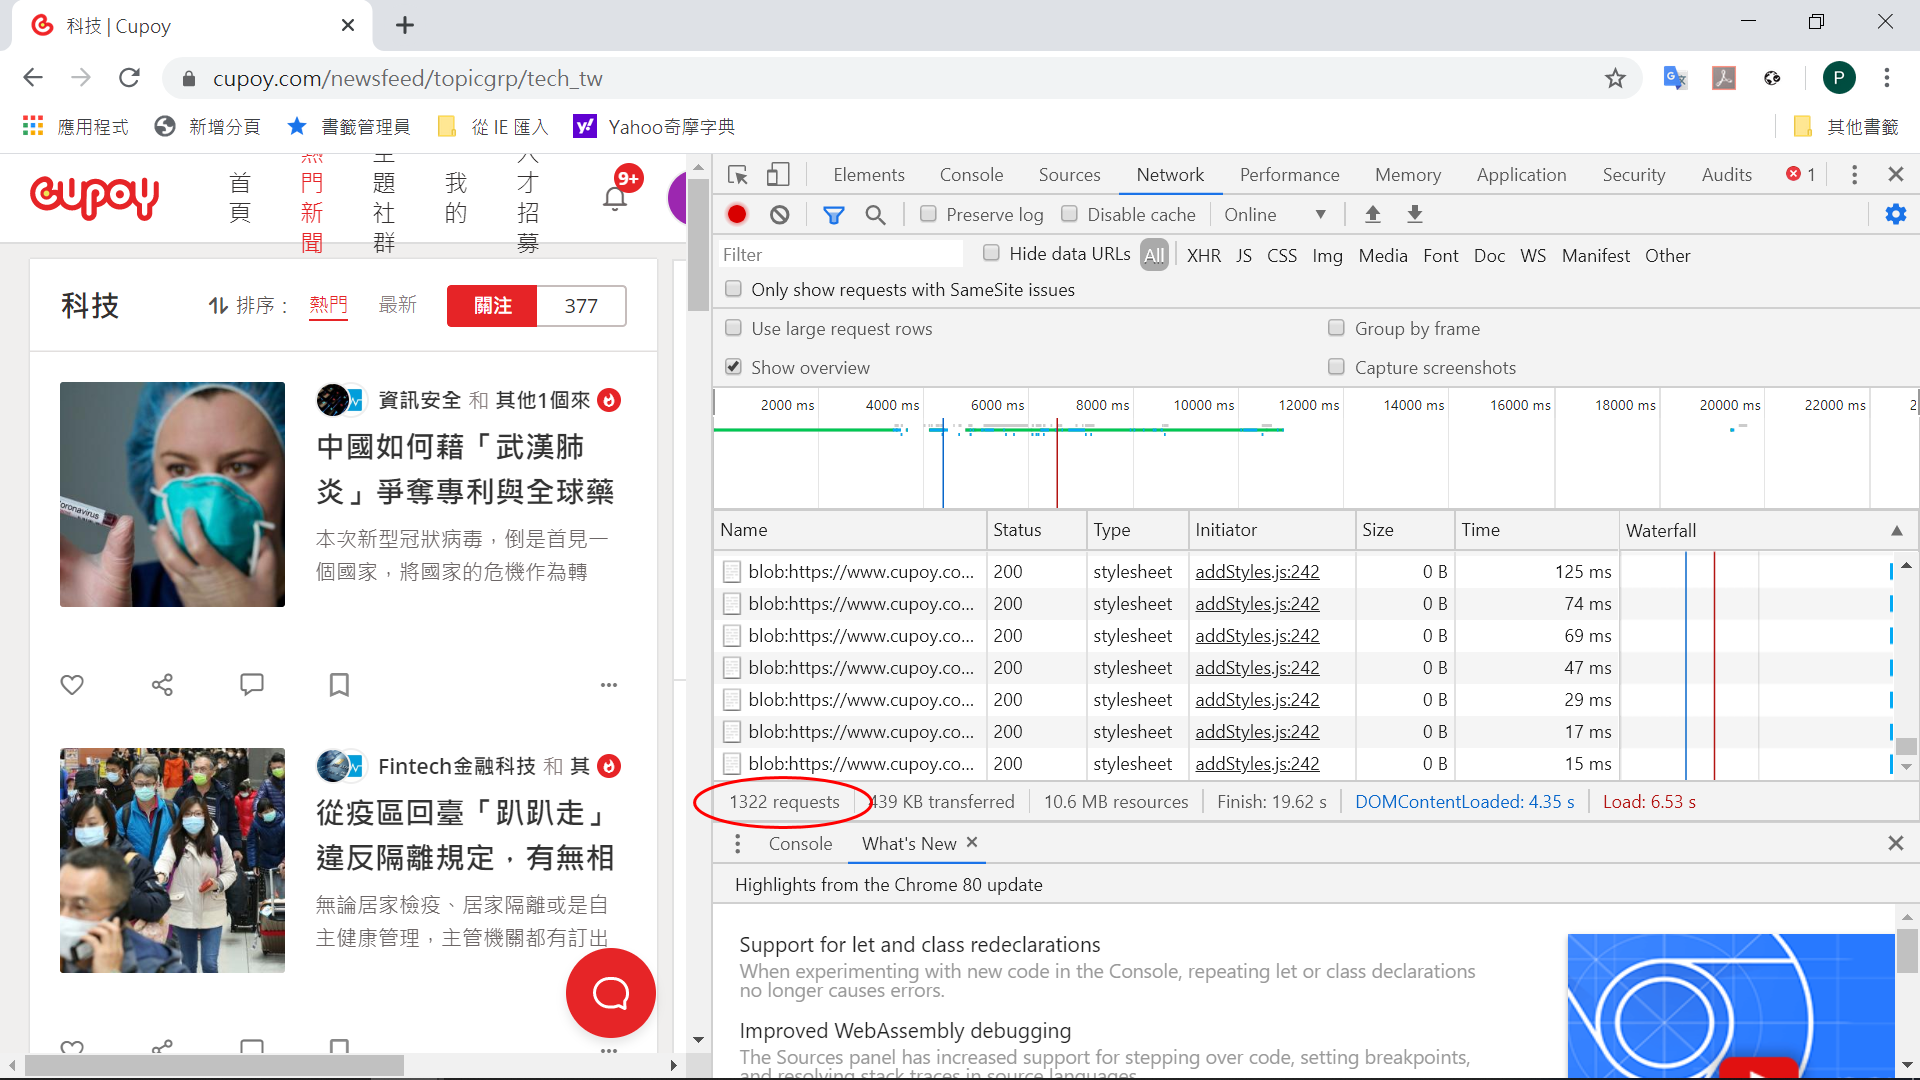
  

  

  
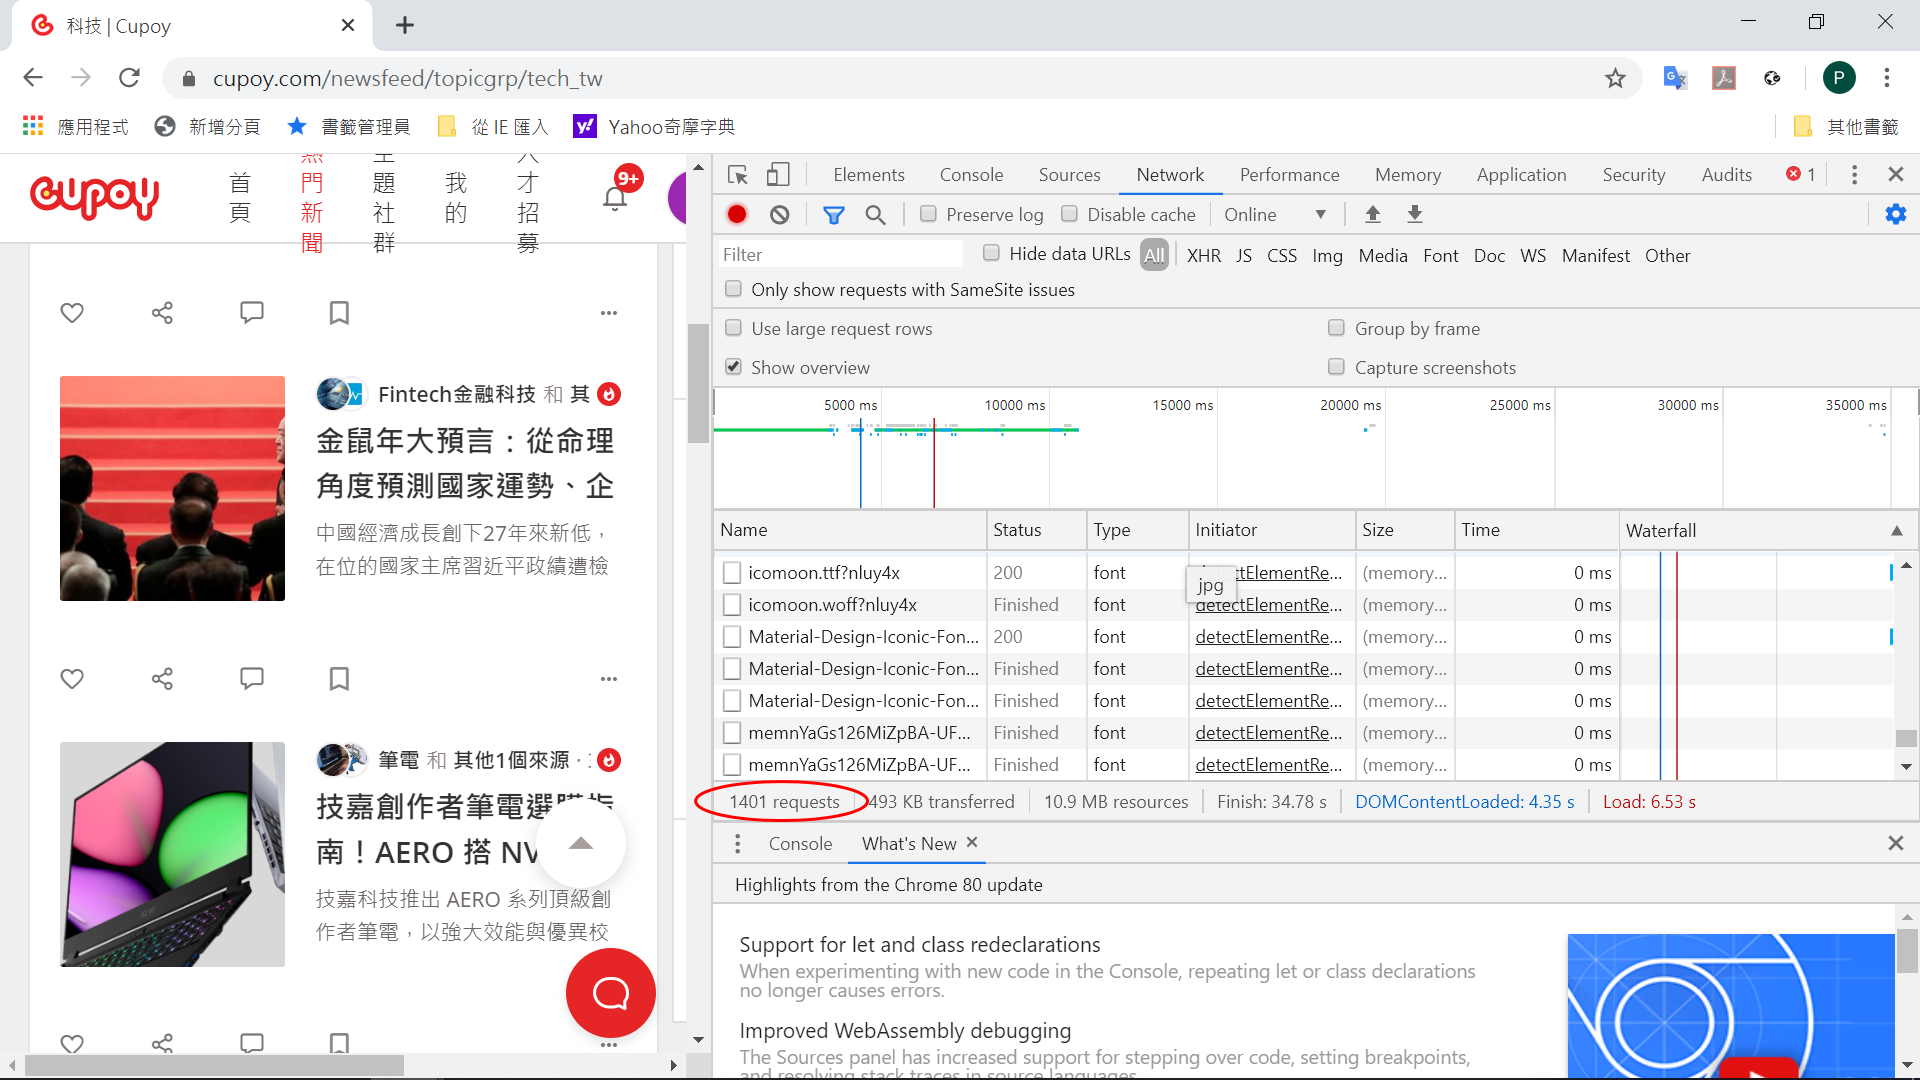

## Target 2  
Ê†πÊìöÁ∂≤Á´ôÁâπÊÄßÈÅ∏Êìá requests / BeautifulSoup / selenium Á≠â‚ºØÂ∑•ÂÖ∑ÈÄ≤‚æèË°åÔ®àÁà¨Ëü≤Êï¥ÁêÜÔß§ 

In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import pandas as pd

In [2]:
url = "https://www.cupoy.com/newsfeed/topicgrp/tech_tw"  # tech news

### Use Selenium to simulate behaviors of browser and collect news

In [3]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get(url)  # open browser and link to targeted url

In [4]:
SCROLL_PAUSE_TIME = 6

time.sleep(SCROLL_PAUSE_TIME)

#
# simulate scorll down and update web pages
#

columns = ['No.', 'Title', 'url', 'Classification', 'brief']
news_list = pd.DataFrame(columns = columns)
news_counter = 0

'''
refer to: 
https://stackoverflow.com/questions/48850974/selenium-scroll-to-end-of-page-indynamically-loading-webpage/48851166
'''
last_height = 0
while True:
    # crawl the web content and extract the news
    html = browser.page_source
    soup = BeautifulSoup(html, "lxml")
    
    #all_news = soup.find("div", attrs={'class':'ReactVirtualized__Grid__innerScrollContainer'})
    news_block = soup.find_all('div', attrs={'class':'sc-eEieub sc-iuDHTM ibJqYc'})
    
    for i, news in enumerate(news_block):
        news_item = []
        news_body = news.find('a')
        news_title = news_body.get('title')
        news_url = news_body.get('href')
        news_cls = news.find('div', attrs = {'class': 'sc-gacfCG bPSpUf'}).string
        news_brief = news.find('p', attrs = {'class': 'sc-FQuPU sc-ciodno bvnzOw'}).string
        
        if news_title not in list(news_list['Title']):
            news_counter += 1
            news_item.append(f"{news_counter:03}")
            news_item.append(news_title)
            news_item.append(news_url)
            news_item.append(news_cls)
            news_item.append(news_brief)
            
            news_list = news_list.append(pd.DataFrame([news_item], columns = columns),
                                         ignore_index = True)
            
            print("----------------------------------------------------------------------")
            print(f"[{news_counter:03}] {news_title}")
            print(f"news_url: {news_url}")
            print(f"classification: {news_cls}")
            print(f"news_brief: {news_brief}")
            print("----------------------------------------------------------------------")
        
    if news_counter >= 500:
        print("*** 500 articles ***")
        break
    
    # Scroll down a page.
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    # browser.execute_script("window.scrollTo(0, 100000);")
    
    # Wait to load the page.
    time.sleep(SCROLL_PAUSE_TIME)
    
    # Calculate new scroll height and compare with last scroll height.
    new_height = browser.execute_script("return document.body.scrollHeight")
    
    print(f"last_height: {last_height}")
    print(f"new_height: {new_height}")

    if new_height == last_height:
        print("*** scroll to the bottom ***")
        break
    print("updating.....")
    last_height = new_height


----------------------------------------------------------------------
[001] Ê∑∫Ë´áÂÄãÊÄßÂåñÊé®Ëñ¶Á≥ªÁµ±‰∏≠ÁöÑÈùûÊé°Ê®£Â≠∏Áøí | Ê©üÂô®‰πãÂøÉ
news_url: https://www.jiqizhixin.com/articles/2020-02-19-4
classification: AIËàáÂ§ßÊï∏Êìö
news_brief: Âú®ËøëÂÖ©Âπ¥ÔºåÊ∏ÖËèØÂ§ßÂ≠∏‰ø°ÊÅØÊ™¢Á¥¢Ë™≤È°åÁµÑÔºàTHUIRÔºâÈ¶ñÊ¨°Êé¢Á¥¢‰∫ÜÂ∞áÈùûÊé°Ê®£Á≠ñÁï•ÔºàNon-Sampling, Whole-data based LearningÔºâÊáâÁî®Âà∞Âü∫ÊñºÁ•ûÁ∂ìÁ∂≤Áµ°ÁöÑÊé®Ëñ¶Á≥ªÁµ±‰∏≠„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[002] ÊûúÁÑ∂Ëê¨ËÉΩÔºåAmazon Â∑•Á®ãÂ∏´ÈñãÊ∫êÂá∫ Excel ÈõªËÖ¶Ë¶ñË¶∫Ë™≤Á®ã - INSIDE
news_url: https://www.inside.com.tw/article/18957-computer-vision-basics-in-microsoft-excel-by-Amazon-Engineer
classification: FintechÈáëËûçÁßëÊäÄ
news_brief: ÈÄôÂ†ÇË™≤Âè™Ë¶ÅÊúâ Excel Âü∫Á§éÁü•Ë≠òÂç≥ÂèØÂÖ•ÊâãÔºåÁîöËá≥ÈÇÑËÉΩÁõ¥Êé•Âæû Excel ‰∏≠ÈÄ≤Ë°å‰∫∫ËáâËæ®Ë≠ò„ÄÅÈúçÂ§´ËÆäÊèõÁ≠âË¶ñË¶∫ÁÆóÊ≥ïÔºÅ Ê®ôÁ±§: Amazon, Excel, ÈõªËÖ¶Ë¶ñË¶∫
------------------

last_height: 5565
new_height: 8375
updating.....
----------------------------------------------------------------------
[027] AeyeQËà™Á©∫ÊØçËâ¶Á¥öÊØçÊùøÔºåËºïÈ¨ÜÁÇ∫JetsonËø∑‰Ω†AIÈõªËÖ¶ÈÄ£Êé•Â§öËá∫Á∂≤Ë∑ØÊîùÂΩ±Ê©ü | TÂÆ¢ÈÇ¶
news_url: https://www.techbang.com/posts/76280-aeyeq-aircraft-carrier-class-motherboard-easy-to-connect-multiple-network-cameras-to-jetson-mini-ai-computers
classification: Á§æ‰∫§Â™íÈ´î
news_brief: None
----------------------------------------------------------------------
----------------------------------------------------------------------
[028] ÈñãÁôºËÄÖÁ∂≤Á´ôÊÑèÂ§ñ‰∏äÁ∑öÔºåAndroid 11 Â∞áÊúÉÊèê‰æõÈÄô‰∫õÂäüËÉΩ | TÂÆ¢ÈÇ¶
news_url: https://www.techbang.com/posts/76226-developers-website-accidentally-goes-live-android-11-may-provide-these-features
classification: GoogleÂ∞àÂçÄ
news_brief: Êó•Ââç Android 11 ÈñãÁôºËÄÖÁ∂≤Á´ôÁöÑÁôªÈåÑÈ†ÅÈù¢ÊõæÁ∂ìÊÑèÂ§ñ‰∏äÁ∑öÔºåÊØîÊ≠£Â∏∏ÊÉÖÊ≥Å‰∏ãÁöÑ‰∏äÁ∑öÊôÇÈñìÂ∑Æ‰∏çÂ§öÊó©‰∫Ü‰∏ÄÂÄãÊúàÔºåÂèØÊÉúÁöÑÊòØË£°Èù¢ÁöÑÈÄ£ÁµêÈÉΩÊòØ‰∏çÂèØ‰ª•Áî®ÁöÑ„ÄÇ‰∏ç

last_height: 10802
new_height: 13790
updating.....
----------------------------------------------------------------------
[052] ÊæéÊπñ-Â§ßËèìËëâÊü±ÁãÄÁéÑÊ≠¶Â≤©-Ê¨£ÊîùÂΩ±-Ê¨£ÂÇ≥Â™íÊîùÂΩ±È†ªÈÅì
news_url: https://solomo.xinmedia.com/photo/13027-PengHu?utm_source=xinphotofb&utm_medium=fbpost&utm_campaign=xinmedia
classification: GoogleÂ∞àÂçÄ
news_brief: ÂúñÁâáË™™ÊòéÔºöÂúñÊîù/Èô≥Êõâ‰ø°(CEO) Êèê‰æõÊãçÊîùÈªûË≥áË®äÔºöÂ§ßËèìËëâÊü±ÁãÄÁéÑÊ≠¶Â≤©ÔºåÈÄôÁâáÈõÑÂÅâÁöÑÁéÑÊ≠¶Â≤©Áü≥Â£ÅÔºåÊòØÂõ†ÁÇ∫Êµ∑Â∫ï‰∏ãÊ∫∂ÊºøÂõ†ÁÇ∫Âú∞ÂΩ¢‰∏äÂçáÔºåÊ∫∂ÊºøÂÜ∑ÂçªÊî∂Á∏Æ‰πãÂæåÔºåÂ∑ñÈ´îÁî¢ÁîüÁöÑ‰∫î„ÄÅÂÖ≠ËßíÂΩ¢ÁöÑÂ∑ñÊü±Á†¥Ë£ÇÔºåÈÄôÁ®ÆÁ†¥Ë£ÇÈù¢ËàäÁ®±ÁÇ∫Êü±ÁãÄÁØÄÁêÜ„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[053] „ÄåFun! Ëá∫ËÇ°!„ÄçÊµÆÂãïÁúãËÇ°Â∞èÂ∑•ÂÖ∑ÔºåÈö®ÊôÇÈÉΩËÉΩÈóúÊ≥®ËÇ°Â∑øË°åÊÉÖÔºàAndroidÔºâ ‚Äì ÈáçÁÅåÁãÇ‰∫∫
news_url: https://briian.com/65291/
classification: APPÊáâÁî®Á®ãÂºè
news_brief: ÊúâÂú®ËÇ°Á•®Â∑øÂ†¥Ë£°ÊâìÊªæÁöÑÊúãÂèã

last_height: 16396
new_height: 19384
updating.....
----------------------------------------------------------------------
[079] Ê•≠ÁïåÊÉÖÂ†±ÔºöÊñ∞Áâà iPad Pro Â∞áÊñº 3 ÊúàÂ∑¶Âè≥Êé®Âá∫ - New MobileLife ÊµÅÂãïÊó•Â†±
news_url: https://www.newmobilelife.com/2020/02/18/2020-ipad-pro-launch-in-march-rumor/?utm_content=buffercd07f&utm_medium=social&utm_source=facebook.com&utm_campaign=buffer
classification: APPÊáâÁî®Á®ãÂºè
news_brief: ËøëÊó•Ê†πÊìö DigiTimes Â†±Â∞éÊåáÂá∫ÔºåÊúâ‰æÜËá™‰æõÊáâÈèàÁöÑÊ∂àÊÅØÂÆ£Á®±Êñ∞Ê¨æ iPad Pro ÊúÉÂú®‰ªäÂπ¥ 3 ÊúàÂ∑¶Âè≥ÊôÇÂæåÊé®Âá∫Ôºå‰∏¶‰∏îÁîüÁî¢‰ΩúÊ•≠Â∑≤Âú®‰ªäÂπ¥Êò•ÁØÄÂâçÂ±ïÈñã„ÄÇ‰ΩÜÂèØËÉΩÊòØÂõ†ÁÇ∫ 2019 ÂÜ†ÁãÄÁóÖÊØíÁóÖÁöÑÂΩ±ÈüøÔºåÂõ†Ê≠§Áî¢ÈáèÁöÑÊàêÈï∑Áõ∏Áï∂Á∑©ÊÖ¢ÔºåÊ•≠Áïå‰∫∫Â£´È†ê‰º∞ÂæóÁ≠âÂà∞ 4 ÊúàÊâçÊúâÂèØËÉΩÈÅîÂà∞Áî¢ÂìÅÁöÑÂá∫Ë≤®È´òÂ≥Ø„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[080] Áúü„ÄåÂ§ß„Äç‰Ωú„ÄÄÁñë‰ºº„ÄäFinal Fantasy VII REMAKE„ÄãÂ§ñÂåÖË£ùÊõùÂÖâÊâÄÈúÄÁ©∫Èñì -

last_height: 21994
new_height: 24256
updating.....
----------------------------------------------------------------------
[103] ËòãÊûú„ÄåÂèóÁñ´ÊÉÖË°ùÊìä„ÄçÔºÅÂÖ©Â§ßÈóúÈçµÂõ†Á¥†ÔºåQ1 ÁáüÊî∂ÊÅêÈõ£ÈÅîÊ®ô | Á∂ìÁêÜ‰∫∫
news_url: https://www.managertoday.com.tw/articles/view/59241
classification: ËòãÊûúÂ∞àÂçÄ
news_brief: ËòãÊûúË°®Á§∫ÔºåÁî±ÊñºÊ≠¶Êº¢ËÇ∫ÁÇéÁñ´ÊÉÖÊú™Ë¶ãÊîπÂñÑÔºåÂ∞áÁÑ°Ê≥ïÈÅîÂà∞Êú¨Â≠£ÁáüÊî∂Â±ïÊúõÊï∏Â≠ó„ÄÇÂõ†‰∏≠ÂúãÂæ©Â∑•ÊÉÖÊ≥ÅÊØîÈ†êÊúüÁ∑©ÊÖ¢ÔºåiPhone‰æõÊáâÂèóÈôêÔºåËÄåÈñÄÂ∏Ç‰πüÂ§öÈñâÂ∫óÔºå‰æõÈúÄÂÖ©Á´ØÈÉΩÂèóÂΩ±Èüø„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[104] WordPressÂ§ñÊéõThemeGrill Demo ImporterÂèØËÆìÈß≠ÂÆ¢Ê∏ÖÈô§Ë≥áÊñôÂ∫´ÔºåÊ≥¢Âèä20Ëê¨Á∂≤Á´ô | iThome
news_url: https://www.ithome.com.tw/news/135891
classification: Ë≥áË®äÂÆâÂÖ®
news_brief: Ë©≤ÊºèÊ¥ûÊ≥¢ÂèäThemeGrill Demo Importer 1.3.4Âà∞1.6.1ÁâàÔºåÂÆòÊñπÂ∑≤ÈáãÂá∫ÂÆåÊàê‰øÆË£úÁöÑÊñ∞Áâà
-----------------------------------------------

last_height: 27070
new_height: 29506
updating.....
----------------------------------------------------------------------
[127] Êñ∞ 13 Ëã±Âêã MacBook Pro ÊõùÂÖâÔºöÊê≠Ëºâ 10 Â•àÁ±≥ËôïÁêÜÂô®ÔºåÊÄßËÉΩÂ§ßÂπÖÊèêÂçá | TechNews ÁßëÊäÄÊñ∞Â†±
news_url: https://technews.tw/2020/02/17/new-13-inch-macbook-pro-exposed/?utm_source=fb_tn&utm_medium=facebook
classification: ËòãÊûúÂ∞àÂçÄ
ËøëÊó•ÂêçÂè´ _rogame ÁöÑÁ∂≤ÂèãÂú® Twitter ÁàÜÊñôÔºå2020 Âπ¥ 13 ÂêãÊñ∞ MacBook Pro Â∞áÊê≠...0 ÂÑÑÁæéÂÖÉÁáüÊî∂ËàáÂêåÊúüÁõ∏ÊØî‰∏ãË∑å 3.45%Ôºå‰ªäÂπ¥ËòãÊûúÊàñË®±ÊúÉÂú® Mac Ê•≠ÂãôÂ§ö‰∏ã‰∏ÄÈªûÂ∑•Â§´„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[128] È´òÁ´ØÁñ´ËãóËàáÁæéÂúãÂúãË°õÈô¢Âêà‰ΩúÔºåÈñãÁôºÊ≠¶Êº¢ËÇ∫ÁÇéÁñ´Ëãó | TechNews ÁßëÊäÄÊñ∞Â†±
news_url: https://technews.tw/2020/02/17/medigenvac-nih-wuhan-pneumonia-vaccine/?utm_source=fb_tn&utm_medium=facebook
classification: Ë≥áË®äÂÆâÂÖ®
È´òÁ´ØÁñ´ËãóÂÖ¨ÂëäËàáÁæéÂúãÂúãË°õÈô¢Êñº 2 Êúà 16

last_height: 32464
new_height: 34900
updating.....
----------------------------------------------------------------------
[153] ÂâµÊ•≠ÈÄô‰ª∂‰∫ãÔºåÁèæÂú®Âπ¥Ëºï‰∫∫ÂèØËÉΩ‰∏çË¶∫ÂæóÈÇ£È∫ºÈÖ∑‰∫Ü
news_url: http://sc.piee.pw/QK4H6
classification: ÂâµÊ•≠
news_brief: ÂâµÊ•≠ÈÄô‰ª∂‰∫ãÔºåÊòØÈ´òÈ¢®Èö™‰ΩÜÊî∂Á©´Á∂ìÈ©óÊ•µÂ§öÁöÑ‰∏ÄÊ¢ùË∑Ø„ÄÇÂ≠∏ÁîüÊôÇ‰ª£ÊàëÂÄëÂèØËÉΩÈÉΩÊúâÂÄãÂâµÊ•≠Â§¢ÔºåÊòØ‰ªÄÈ∫ºËÆìÈÇ£‰∫õÂ§¢Á¢é‰∫ÜÂë¢Ôºü
----------------------------------------------------------------------
----------------------------------------------------------------------
[154] Ê≠¶Êº¢ËÇ∫ÁÇéÂâµÈÄ†‰∏≠Âúã„ÄåÁ∑ö‰∏äÂ•áËπü„ÄçÔºÅ3ÂÑÑ‰∫∫Âú®ÂÆ∂Ëæ¶ÂÖ¨„ÄÅÂçÉËê¨‰∫∫ÈÅ†Ë∑ù‰∏äË™≤„ÄÅÁúãÁóÖÔΩúÊï∏‰ΩçÊôÇ‰ª£
news_url: https://www.bnext.com.tw/article/56623/remote-work-telework-china-online-learning-medical-service
classification: ËÅ∑Ê∂Ø
news_brief: Ê≠¶ËÇ∫Áñ´ÊÉÖÂà∫ÊøÄ‰∏≠ÂúãÁöÑÈÅ†Á´ØÊúçÂãôÂïÜÊ©üÔºåÈô§ÂêÑÁ®Æ‰ºÅÊ•≠ÈÄöË®äËªüÈ´îËøé‰æÜÂæÄÂ∏∏ÂçÅÊï∏ÂÄçÊàêÈï∑Â§ñÔºåÁ∂≤Ë∑ØÈÜ´ÁôÇË´ÆË©¢„ÄÅÁ∑ö‰∏äË™≤Á®ãÁ≠âÊúçÂãô‰πüÈÉΩÂú®ÈÄôÊ®£ÁöÑÂ§ßÁí∞Â¢É‰∏ãÔºåÈñãÂïüÁôºÂ

last_height: 37888
new_height: 40497
updating.....
----------------------------------------------------------------------
[179] Ê©üÂô®Â≠∏ÁøíÁ¨¨‰∏ÄÊ≠•ÔºåÈÄôÊòØ‰∏ÄÁØáÊâãÊääÊâãÁöÑÈö®Ê©üÊ£ÆÊûóÂÖ•ÈñÄÂØ¶Êà∞ | Ê©üÂô®‰πãÂøÉ
news_url: https://www.jiqizhixin.com/articles/2020-02-17-12
classification: AIËàáÂ§ßÊï∏Êìö
news_brief: Âà∞‰∫Ü 2020 Âπ¥ÔºåÊàëÂÄëÂ∑≤Á∂ìËÉΩÊâæÂà∞ÂæàÂ§öÂ•ΩÁé©ÁöÑÊ©üÂô®Â≠∏ÁøíÊïôÁ®ã„ÄÇÊú¨ÊñáÂâáÂæûÊúÄÊµÅË°åÁöÑÈö®Ê©üÊ£ÆÊûóÂá∫ÁôºÔºåÊâãÊääÊâãÊïô‰Ω†ÊßãÂª∫‰∏ÄÂÄãÊ®°ÂûãÔºåÂÆÉÁöÑÂÆåÊï¥ÊµÅÁ®ãÂà∞Â∫ïÊòØ‰ªÄÈ∫ºÊ®£ÁöÑ„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[180] AAAI 2020 Ë´ñÊñáËß£ËÆÄÔºöÈóúÊñºÁîüÊàêÊ®°ÂûãÁöÑÈÇ£‰∫õ‰∫ã | Ê©üÂô®‰πãÂøÉ
news_url: https://www.jiqizhixin.com/articles/2020-02-17-11
classification: AIËàáÂ§ßÊï∏Êìö
news_brief: ÊèêÂà∞ÁîüÊàêÊ®°ÂûãÔºåÊØèÂÄã‰∫∫È¶ñÂÖàË¶ÅËÄÉÊÖÆÁöÑÂïèÈ°åÊáâË©≤ÈÉΩÊòØÈÄôÂÖ©ÂÄã‚Äî‚ÄîÁîüÊàê‰ªÄÈ∫ºÔºåÂ¶Ç‰ΩïÁîüÊàê„ÄÇÊú¨Êñá‰ªãÁ¥πÁöÑ‰∏âÁØáË´ñÊñáÂ∞±ÂåÖÂê´‰∫Ü‰∏âÁ®ÆÁîüÊ

last_height: 43658
new_height: 46268
updating.....
----------------------------------------------------------------------
[207] ‚îÇÊ®ÇÂ§©Â∏ÇÂ†¥‚îÇÁæéÈ£üË©¶ÂêÉÈÉ®ËêΩÂÆ¢ÂêåÊ®ÇÊúÉ‚îÇË∂ÖÈÅé10Á®ÆË∂Ö‰∫∫Ê∞£ÂÆÖÈÖçÁæéÈ£üËàáÊÇ®Âêå‰∫´!!‚îÇÈáëÊúàÁ¨àÈ£üÈ§ÖËàñ‚îÇËÄ≥Êù±ÂÆ∂‚îÇÈæçËôéËàíÈ£ü‚îÇËä±È§°ÊÑõÁîúÈªûËóùË°ìÁ©∫Èñì‚îÇÈÆÆ‰πãÈ£üÂ∫ú‚îÇÊòéÂÆèÊãîÁµ≤Âú∞Áìú‚îÇÁ¶æËèìÂ∑ùÁÉòÂüπÂùä‚îÇÈæçÁõäËéä‚îÇÊ®ÇÁîúÊæ≥ÂºèÊâã‰Ωú‚îÇÈÖµÁ¥†Ë±¨‚îÇÂíåÊò•Â†ÇÁõ¥ÁáüÂ∫ó‚îÇ‰∏ç‰∏ÄÊ®£Ê∞¥ÊûúÊóóËâ¶Â∫ó‚îÇ ‚Äì Â™ΩÂ™ΩÁ∂ìÔΩúÂ∞àÂ±¨ÊñºÂ™ΩÂ™ΩÁöÑÁ∂≤Á´ô
news_url: https://mamaclub.com/learn/%e2%94%82%e6%a8%82%e5%a4%a9%e5%b8%82%e5%a0%b4%e2%94%82%e7%be%8e%e9%a3%9f%e8%a9%a6%e5%90%83%e9%83%a8%e8%90%bd%e5%ae%a2%e5%90%8c%e6%a8%82%e6%9c%83%e2%94%82%e8%b6%85%e9%81%8e10%e7%a8%ae%e8%b6%85%e4%ba%ba/
classification: ÁæéÈ£ü
news_brief: Êî∂ËóèÊñáÁ´† ‚îÇÈÄôÊ¨°ÂæàÈ´òËààËÉΩÂèóÂà∞Ê®ÇÂ§©Â∏ÇÂ†¥ÁöÑÈÇÄË´ãÔºå‰æÜÂèÉÂä†ÈÄôÊ¨°ÁöÑÁæéÈ£üÈÉ®ËêΩÂÆ¢ÂêåÊ®ÇÊúÉ„ÄÇÁèæÂ†¥ÈõÜÂêàË∂ÖÈÅé10Á®ÆË∂Ö‰∫∫Ê∞£ÂÆÖÈÖçÁæéÈ£üÔºåÁúü ‚Ä¶
----------------------------------------------------------------

last_height: 48518
new_height: 51298
updating.....
----------------------------------------------------------------------
[234] OPPO Ëá™‰∏ªÂìÅÁâåÊô∫ÊÖßÊâãÈå∂ÂÜçÊõùÂÖâÔºåÊâìÈÄ†ÁßªÂãïË®≠ÂÇôÂÆ∂ÊóèÁ≥ªÁî¢ÂìÅ - YahooÂ•áÊë©Êñ∞ËÅû
news_url: https://tw.news.yahoo.com/oppo-%E8%87%AA%E4%B8%BB%E5%93%81%E7%89%8C%E6%99%BA%E6%85%A7%E6%89%8B%E9%8C%B6%E5%86%8D%E6%9B%9D%E5%85%89-%E6%89%93%E9%80%A0%E7%A7%BB%E5%8B%95%E8%A8%AD%E5%82%99%E5%AE%B6%E6%97%8F%E7%B3%BB%E7%94%A2%E5%93%81-175600778.html
classification: 3CÁî¢ÂìÅ
news_brief: OPPO Â∑≤Á∂ì‰∏çÊòØÂÖâÊúÉÂÅöÊô∫ËÉΩÊâãÊ©üÁöÑÁî¢ÂïÜ‰∫Ü„ÄÇÈô§‰∫ÜËÄ≥Ê©üÁ≠âÂ§ñË®≠Áî¢ÂìÅÔºåOPPO Â∞áË£úË∂≥Êô∫ÊÖßÊâãÈå∂ÈÄôÂÄãÁº∫Âè£„ÄÇÊ†πÊìöÂÖ∂ÂâØÁ∏ΩË£ÅÁöÑÊúÄÊñ∞ÂæÆÂçöÁàÜÊñôÔºåÁ≠âÊñºÂÆòÊñπÁ¢∫Ë™ç‰∫ÜÈÄôÊ¨æÁî¢ÂìÅÂç≥Â∞á‰∏äÂ∏Ç„ÄÇ ÂØ¶Èöõ‰∏äÊàëÂÄë‰∏çÊ≠¢‰∏ÄÊ¨°Áúã
----------------------------------------------------------------------
----------------------------------------------------------------------
[235] ÊøÄÁôºÂ≠©Â≠êÂâµÊÑè„ÄÄÁî®Ë°åÂãïË£ùÁΩÆËìãÂüéÂ†°„ÄäCastle Blocks„ÄãÈôêÊôÇÂÖçË≤ª - New MobileL

last_height: 53729
new_height: 56717
updating.....
----------------------------------------------------------------------
[256] Ê∂àÊØíÊäóÊ≠¶Êº¢ËÇ∫ÁÇéÔºüÂÖàÁû≠Ëß£ÈÖíÁ≤æÊºÇÁôΩÊ∞¥ÊÄéÈ∫ºÁî®ÊâçÂÆâÂÖ®ÊúâÊïà - PanSci Ê≥õÁßëÂ≠∏
news_url: https://pansci.asia/archives/180010
classification: Ë≥áË®äÂÆâÂÖ®
news_brief: Ë©≤ÊÄéÈ∫ºÂÅöÊâçËÉΩÂÆâÂÖ®ÊúâÊïàÂú∞ÊÆ∫ÊªÖ„ÄåÊñ∞ÂûãÂÜ†ÁãÄÁóÖÊØí„ÄçÔºüÊú¨ÊñáÈáùÂ∞çÊó•Â∏∏ÁîüÊ¥ª‰∏≠ÊØîËºÉÂÆπÊòìÂèñÂæóËàá‰ΩøÁî®ÁöÑ„ÄåÈÖíÁ≤æ„ÄçËàá„ÄåÊºÇÁôΩÊ∞¥„ÄçÔºå‰ªãÁ¥πÂ¶Ç‰ΩïÊ≥°Ë£ΩÊ≠£Á¢∫ÊøÉÂ∫¶Ôºå‰ª•ÂèäÊ∂àÊØíÊôÇÊáâË©≤Â∞èÂøÉÁöÑÊ≥®ÊÑè‰∫ãÈ†Ö„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[257] ÈÅ†ÂÇ≥Âä©ÊîªËá∫ÈõªÔºå24Ëê¨Êô∫ÊÖßÈõªË°®ÈÄöË®äÊ®°ÁµÑÂïüÂãïÂª∫ÁΩÆ | TÂÆ¢ÈÇ¶
news_url: https://www.techbang.com/posts/76169-far-distance-assistance-station-power-240000-smart-meter-communication-module-start-up
classification: Áâ©ËÅØÁ∂≤
news_brief: ÊîØÊåÅÊîøÂ∫úÊô∫ÊÖßÈõªÁ∂≤ÊîøÁ≠ñÔºåÈÅ†ÂÇ≥Èõª‰ø°ÁπºÂÖàÂâçÂçîÂä©Ëá∫Èõ

last_height: 59153
new_height: 62141
updating.....
----------------------------------------------------------------------
[282] Â¶Ç‰ΩïÁî® Google ÂÖçË≤ªÂ∑•ÂÖ∑ÊâìÈÄ†Âø´ÈÄüÁöÑ OCR ÁÑ°Á¥ôÂåñÂ∑•‰ΩúÊµÅÁ®ãÔºü
news_url: https://www.playpcesor.com/2020/02/google-ocr.html
classification: GoogleÂ∞àÂçÄ
news_brief: ÂàÜ‰∫´ÂêÑÁ®ÆË°åÂãïÂ∑•‰ΩúÊäÄÂ∑ß„ÄÅÈõ≤Á´ØÁîüÊ¥ªÊáâÁî®ÔºåÂñÑÁî®Êï∏‰ΩçÂ∑•ÂÖ∑ÊîπËÆä‰Ω†ÊàëÁöÑÂ∑•‰ΩúÊïàÁéáËàáÁîüÊ¥ªÂìÅË≥™„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[283] OPPO Find X2ÂèØËÉΩÊúÉÊé®Âá∫ProÁâàÊú¨ Âä†Âº∑Áõ∏Ê©üÊãçÊîùÂäüËÉΩ (151806) - ÁôÆÁßëÊäÄ Cool3c
news_url: https://www.cool3c.com/article/151806
classification: 3CÁî¢ÂìÅ
news_brief: Mash YangÁôº‰ΩàOPPO Find X2ÂèØËÉΩÊúÉÊé®Âá∫ProÁâàÊú¨ Âä†Âº∑Áõ∏Ê©üÊãçÊîùÂäüËÉΩÔºåÁïôË®Ä0ÁØáÊñº2020-02-18 20:46Ôºå0‰ΩçÁúãÈÅé(Ë∂ÖÁ¥öÁÜ±ÈñÄ)ÔºöOPPOÈ†êÊúüÂú®Find X2ProÁâàÊú¨Â∞áÊúÉÈÄ≤‰∏ÄÊ≠•Âä†Âº∑Áõ∏Ê©üÊãçÊîùÂäüËÉΩÔºåÊúâÂèØËÉΩÊé°Áî®ÂèØÊãçÊîùÊõ¥ÈÅ†Ë∑ùÈõ¢ÁöÑÊΩõÊúõÂ

last_height: 64751
new_height: 67913
updating.....
----------------------------------------------------------------------
[306] DJ Audio Editor 8.0.0.0 - Èü≥Ê®ÇÈåÑË£ΩÁ∑®ËºØËªüÈ´î        -         ÈòøÊ¶ÆÁ¶èÂà©Âë≥ - ÂÖçË≤ªËªüÈ´î‰∏ãËºâ
news_url: https://www.azofreeware.com/2020/02/dj-audio-editor.html
classification: APPÊáâÁî®Á®ãÂºè
news_brief: Èü≥Ê®ÇÈåÑË£ΩÁ∑®ËºØËªüÈ´î - DJ Audio EditorÔºåÂèØ‰ª•Ââ™Âàá„ÄÅÂêà‰Ωµ„ÄÅÂàÜÂâ≤„ÄÅ‰øÆÂâ™„ÄÅÂà™Èô§ÈÉ®‰ªΩ„ÄÅÊ∑∑ÂêàËÅ≤Èü≥Ê™îÔºåÂæû‰ªª‰ΩïËº∏ÂÖ•‰æÜÊ∫êÈåÑË£ΩËÅ≤Èü≥ÊàñÈü≥Ê®ÇÔºåËºïÈ¨ÜÂ•óÁî®Â§öÁ®ÆÊøæÈè°ÂèäÊïàÊûúÔºåÊîØÊè¥Â§öÁ®ÆÂΩ±Èü≥Ê†ºÂºèÔºåÁ∑®ËºØÈü≥Ê®ÇÊ®ôÁ±§ÂèäÊõ¥Êñ∞Ê≠åÊõ≤Ë≥áË®äÂäüËÉΩÔºåÂ∞áÂΩ±ÁâáËΩâÊ™îÁÇ∫Èü≥Ê®ÇÊ™îÔºàÂæûÂΩ±Áâá‰∏≠Êì∑ÂèñËÅ≤Èü≥Ê™îÔºâ„ÄÇÔºà ÈòøÊ¶Æ ÔºâÔºà ‰∏ãËºâ ÔºâÔºà ...
----------------------------------------------------------------------
----------------------------------------------------------------------
[307] Verizon ÈñãË®≠ÂÄ´Êï¶ 5G ÂØ¶È©óÂÆ§ÂíåÂ∑•‰ΩúÂÆ§ - UNWIRE.PRO
news_url: https://unwire.pro/2020/02/18/verizon-3/ict/
classification: Ëôõ

last_height: 70519
new_height: 72781
updating.....
----------------------------------------------------------------------
[332] Â§èÊôÆÈ¶ñÊé®ÊúÄÈ´òË¶èÊ†º 5G Êô∫ÊÖßÊâãÊ©ü AQUOS R5GÔºÅÊé°Áî® S865 + 4K Pro IGZO Ëû¢Âπï + 8K ÊãçÊîùÊîØÊè¥ ‚Äì 3C ÈÅî‰∫∫ÂªñÈòøËºù
news_url: https://ahui3c.com/63074/aquos-r5g
classification: ÊâãÊ©üÂπ≥Êùø
news_brief: „Äå2/17Êó•Êú¨Ë®ä„ÄçÂ§èÊôÆÊñºÊó•Êú¨Áôº‰Ωà2020Âπ¥Á¨¨‰∏ÄÂ≠£‰∏äÂ∏ÇÁöÑ5GÊô∫ÊÖßÊóóËâ¶Ê©üÁ®Æ„ÄåAQUOS R5G„ÄçÔºåÁÇ∫Êó•Á≥ªÂìÅÁâå‰∏≠Á¨¨‰∏ÄÂÆ∂Êé®Âá∫5GÊâãÊ©üÁöÑÂÖ¨Âè∏„ÄÇÈÅãÁî®5GÂÇ≥Ëº∏ÊäÄË°ìÈ´òÈ†ªÂØ¨„ÄÅ‰ΩéÂª∂ÈÅ≤„ÄÅÂÇ≥Ëº∏ÈÄüÂ∫¶Âø´Á≠âÁâπÈªûÔºåÈÅîÂà∞ÂèØÂú®ÂπæÁßíÈêò‰∏ãËºâÂ§ßÂÆπÈáèÁöÑÂΩ±ÁâáÔºå‰∏¶ÂèØ‰ª•Â∞áÁõ∏Ê©üÊãçÊîùÁöÑÂΩ±ÁâáÂø´ÈÄü‰∏äÂÇ≥Âà∞Èõ≤Á´Ø„ÄÇhttps://www.youtube.com/watch?v=i6
----------------------------------------------------------------------
----------------------------------------------------------------------
[333] Taiwan Is Opening A Giant AI-Focused Business Park
news_url: https://www.forbes.com/sites/ralphjennings/2020/01/27/taiwan-is-opening-a-giant-ai-

----------------------------------------------------------------------
[349] ÈáçÈáèÁ¥ö‰∫∫Â∑•Êô∫ÊÖßÂ∞àÂÆ∂ÊùéÈ£õÈ£õÔºöÊàëÂ∏åÊúõAI‰øùÊåÅË¨ôÂçë...ÔΩúÂ§©‰∏ãÈõúË™å
news_url: https://www.cw.com.tw/article/article.action?id=5094476&template=transformers&utm_source=fb_cw&utm_medium=social&utm_campaign=fb_cw-social-daily-200217
classification: ËÅ∑Ê∂Ø
news_brief: ‰∫∫È°ûÊ≠£Á´ôÂú®Ê≠∑Âè≤ËΩâÊç©ÈªûÔºåÊàëÂÄëÂç≥Â∞áÂâµÈÄ†Âá∫‰∏ÄÁ®ÆÂæπÂ∫ïÊîπËÆäÊú™‰æÜÁîüÊ¥ªÂíåÂ∑•‰ΩúÊñπÂºèÁöÑÁßëÊäÄ„ÄÇ‰ΩÜÊúâÂπæÂÄãËø∑ÊÄùÂøÖÈ†àË¶ÅÁ†¥Ëß£ÔºöAI‰∏çÊúÉÂèñ‰ª£‰∫∫È°ûÔºåËÄå‰∏î‰ªçÂâõËµ∑Ê≠•Ôºå‰∏¶ÈùûËê¨ËÉΩÔºåÊúÉÂá∫ÈåØ„ÄÅÊúâÂÅèË¶ã„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[350] iOS ÊáâÁî®Â∞èÊäÄÂ∑ß ÔºöÂõõÈ†ÖÂø´ÈÄüÊí•ÊâìÈõªË©±ÁöÑÁ•ïË®£ÊïôÂ≠∏
news_url: https://www.kocpc.com.tw/archives/306329
classification: ËòãÊûúÂ∞àÂçÄ
news_brief: ÂÖ´Êàê‰ª•‰∏äÁöÑÊûúÁ≤â‰∏çÁü•ÈÅìÁöÑ‰ΩøÁî®ÊäÄÂ∑ß
-----------------------------------------------------------------

last_height: 78000
new_height: 80958
updating.....
----------------------------------------------------------------------
[369] Á∞°Á´ãÂ≥ØÂçöÂ£´Ëá™GoogleËá∫ÁÅ£ÈÄÄ‰ºëÂæå ÂÆ£‰Ωà‰ª•Áç®Á´ãËë£‰∫ãË∫´ÂàÜÂä†ÂÖ•AppierÂèäiKalaËë£‰∫ãÊúÉ (151634) - ÁôÆÁßëÊäÄ Cool3c
news_url: https://www.cool3c.com/article/151634
classification: Ë∂®Âã¢ËàáÁ≠ñÁï•
news_brief: Mash YangÁôº‰ΩàÁ∞°Á´ãÂ≥ØÂçöÂ£´Ëá™GoogleËá∫ÁÅ£ÈÄÄ‰ºëÂæå ÂÆ£‰Ωà‰ª•Áç®Á´ãËë£‰∫ãË∫´ÂàÜÂä†ÂÖ•AppierÂèäiKalaËë£‰∫ãÊúÉÔºåÁïôË®Ä0ÁØáÊñº2020-02-11 13:20Ôºå0‰ΩçÁúãÈÅé(ÁÜ±ÈñÄ)ÔºöÂåÖÂê´AppierËàáiKalaÁõÆÂâçÈÉΩÊòØ‰∏ªÊâìÁµêÂêà‰∫∫Â∑•Êô∫ÊÖßÊäÄË°ìÊáâÁî®Ôºå‰ª•ÂèäÂ∑®ÈáèÊï∏ÊìöÂàÜÊûêÔºåÂõ†Ê≠§È†êÊúüËÉΩËàáÁ∞°Á´ãÂ≥ØÂçöÂ£´ËÉΩÊúâÊõ¥Ê∑±Â±§Âêà‰ΩúÔºåËóâÊ≠§Êé®Âãï...
----------------------------------------------------------------------
----------------------------------------------------------------------
[370] Arm Cortex-M55„ÄÅEthos-U55 NPUÊû∂ÊßãÁôºË°® ÂµåÂÖ•ÂºèË£ùÁΩÆ‰πüËÉΩÁî®AIÂä†ÈÄüÈÅãÁÆó (151633) - ÁôÆÁßëÊäÄ Cool3c
news_url: https://www.cool3c.com/article/151633
classificat

----------------------------------------------------------------------
[391] ‰∏∫‰ªÄ‰πàË∞∑Ê≠åËÆ§‰∏∫‰∫∫Â∑•Êô∫ËÉΩÈúÄË¶ÅÁõëÁÆ°Ôºü
news_url: http://www.ftchinese.com/story/001086130
classification: AIËàáÂ§ßÊï∏Êìö
news_brief: Ê°ëËææÂ∞î‚Ä¢ÁöÆÊü•‰ºä‰∏∫Ëã±ÂõΩ„ÄäÈáëËûçÊó∂Êä•„ÄãÊí∞Á®ø ÊàëÂú®Âç∞Â∫¶ÈïøÂ§ßÔºå‰ª•ÂâçÂ∞±ÂØπÁßëÊäÄÈ¢á‰∏∫ÁùÄËø∑„ÄÇÊØè‰∏ÄÈ°πÊñ∞ÂèëÊòéÈÉΩÂàáÂÆûÂú∞ÊîπÂèò‰∫ÜÊàëÂíåÂÆ∂‰∫∫ÁöÑÁîüÊ¥ª„ÄÇÁîµËØùËÆ©Êàë‰ª¨Êó†ÈúÄÂ§ßËÄÅËøúË∑ëÂà∞ÂåªÈô¢ÂéªÁúãÊ£ÄÊü•ÁªìÊûú„ÄÇÂÜ∞ÁÆ±ÊÑèÂë≥ÁùÄÊàë‰ª¨ÂáÜÂ§áÈ•≠ËèúÂèØ‰ª•Êõ¥ÁúÅÊó∂ÔºåÁîµËßÜËÆ©Êàë‰ª¨Êî∂ÁúãÂà∞‰∏ñÁïåÊñ∞ÈóªÂíåÊùøÁêÉÊØîËµõ‚Äî‚ÄîÊõæÁªèÊàë‰ª¨Âè™ËÉΩ‰∏ÄËæπÂê¨Áü≠Ê≥¢Êî∂Èü≥Êú∫Ôºå‰∏ÄËæπÂú®Â§¥ËÑëÈáåÊÉ≥Ë±°„ÄÇÂ¶Ç‰ªäÔºåÊàëÂæàËç£Âπ∏ËÉΩÂú®Êñ∞ÊäÄÊúØÁöÑÂèëÂ±ï‰∏≠Âá∫‰∏ÄÂàÜÂäõÔºåÊàë‰ª¨Â∏åÊúõËøô‰∫õÊäÄÊúØËÉΩÂ§üÊîπÂèò‰∏ñÁïåÂêÑÂú∞‰∫∫‰ª¨ÁöÑÁîüÊ¥ª„ÄÇÊúÄÊúâÂâçÊôØÁöÑÈ¢ÜÂüü‰πã‰∏Ä‰æøÊòØ‰∫∫Â∑•Êô∫ËÉΩ(AI)ÔºöÊú¨ÊúàÂ∞±Êúâ‰∏â‰∏™...
----------------------------------------------------------------------
----------------------------------------------------------------------
[392] ‰Ω†Áü•ÈÅì Andr

last_height: 88971
new_height: 91925
updating.....
----------------------------------------------------------------------
[422] AIÊôÇ‰ª£ÁöÑ‰∫∫ÊñáË°ùÊìäÔΩúÁï∂AI‰πüÊúâÂâµÈÄ†ÂäõÔºå‰∫∫È°ûÂ∞áÂÖ®Èù¢Ë¢´Âèñ‰ª£Ôºü | ÁòãË®≠Ë®à FUNDESIGN
news_url: https://www.fundesign.tv/hfec-ai-ptt/?fbclid=IwAR0OPZBJvtA1GfEIlZ69ZvwNj5bWrcZ12RthWQgOaw1UBLuJ83h9laP5Zcs
classification: AIËàáÂ§ßÊï∏Êìö
news_brief: Áî±Ê¥™Âª∫ÂÖ®Âü∫ÈáëÊúÉÂºµÊ∑ëÂæµÂâµÊÑèÁ∏ΩÁõ£Êìî‰ªªÁ∏ΩÁ≠ñÂäÉËàá‰∏ªÊåÅÔºå‰ª•„ÄåAI ÊôÇ‰ª£ÁöÑ‰∫∫ÊñáË°ùÊìä„ÄçÁÇ∫È°åÔºåÈÇÄË´ãËá∫ÁÅ£‰∫∫Â∑•Êô∫ÊÖßÂØ¶È©óÂÆ§ÔºàTaiwan AI LabsÔºâÂâµËæ¶‰∫∫ÊùúÂ•ïÁëæ„ÄÅÁ∑®ËàûÂÆ∂ÈªÉÁøä„ÄÅÊñ∞Â™íÈ´îËóùË°ìÂÆ∂ÈÑ≠ÂÖàÂñªÔºåÂêÑËá™ÂàÜ‰∫´ÂÖ∂Á´ãÂü∫ÊñºÁèæ‰ª£ÁßëÊäÄÁôºÂ±ïÁöÑËóùË°ìÂâµ‰Ωú‚îÄ‚îÄ‰Ω†ÊúÉÈùûÂ∏∏Ë®ùÁï∞AIËÉΩÂú®ËóùË°ì‰∏äÁôºÊèÆÊÄéÊ®£ÁöÑÂäüÁî®ÔºÅ
----------------------------------------------------------------------
----------------------------------------------------------------------
[423] „ÄêÂ∞∑Â∞¨‰∫Ü„Äë‰∏≠ÂúãÈ¶ñÊ¨æÁ®ãÂºèË™ûË®Ä„ÄåÊú®Ëò≠„ÄçÈñãÂ§©Á™óÔºåÁ∂≤ÂèãÔºöÊäÑË•≤ Python ÈÇÑÂñäËá™‰∏ªÁ†îÁôº | Te

last_height: 94526
new_height: 96788
updating.....
----------------------------------------------------------------------
[448] Êú™‰æÜÂûãÊÖãÁöÑÊó•Êú¨ÂïÜÂ∫óÔºü„ÄåÁÑ°‰∫∫‰æøÂà©ÂïÜÂ∫ó„ÄçÁöÑ‰ΩøÁî®ÊñπÂºè | MATCHA - Êó•Êú¨Á∑ö‰∏äÊóÖÈÅäËßÄÂÖâÈõúË™å
news_url: https://matcha-jp.com/tw/8563?utm_source=social&utm_medium=facebook&utm_campaign=tw&utm_content=20200113
classification: ÊóÖÈÅä
news_brief: Âú®Êó•Êú¨Ê¥ªË∫çÂ∑•‰ΩúÁöÑÂπ¥Ëºï‰∫∫ÂÄëÈÄêÊº∏Ê∏õÂ∞ëÔºå‰∫∫Âè£È´òÈΩ°ÂåñÊàêÁÇ∫Á§æÊúÉÂïèÈ°å„ÄÇÂãûÂãï‰∫∫ÂäõÊ∏õÂ∞ëÔºå‰∫∫ÊàñË®±‰πüÊúÉÂæûÂïÜÂ∫óË£°ÈÄêÊº∏Ê∏õÂ∞ë„ÄÇÊèèÁπ™ËëóÈÄôÊ®£Êú™‰æÜÁöÑ„ÄåÁÑ°‰∫∫‰æøÂà©ÂïÜÂ∫ó„ÄçÂú®Êù±‰∫¨ÁöÑJRÊ≤øÁ∑öËªäÁ´ôÁôªÂ†¥„ÄÇÈÄôÊ¨°Â∞áË¶Å‰ªãÁ¥πÊ≠¶ËóèÂ¢ÉÁ´ôÁöÑÁÑ°‰∫∫‰æøÂà©ÂïÜÂ∫ó„ÄåNewDays„ÄçËàáÂÖ∂‰ΩøÁî®ÊñπÂºè„ÄÇ
----------------------------------------------------------------------
----------------------------------------------------------------------
[449] AIÊäÄË°ìÈ†òÂÖàÂêåÊ•≠ÔºåÈ∫•Ëø™ÂâµÈÄ£Á∫å‰∏âÂπ¥Ê¶ÆÁç≤CESÂâµÊñ∞Â§ßÁçéÔΩúÂ§©‰∏ãÈõúË™å
news_url: https://www.cw.com.tw/article/article.action?id=5098

last_height: 99572
new_height: 101834
updating.....
----------------------------------------------------------------------
[470] LG ÂÆ∂ÈõªÂÜçÈÄ≤ÂåñÔºÅÂÖ®Êñ∞Êï≤Êï≤ÁúãÈñÄ‰∏≠ÈñÄÂÜ∞ÁÆ±„ÄÅAI DDÊ¥óË°£Ê©ü„ÄÅÊøïÊãñÊ∏ÖÊΩîÊ©üÂô®‰∫∫ÁôºË°® - SayDigi | ÈªûÂ≠êÁîüÊ¥ª
news_url: https://www.saydigi.com/2020/01/470995.html
classification: AIËàáÂ§ßÊï∏Êìö
news_brief: Âú®Ëá∫ÁÅ£Áõ∏Áï∂ÂèóÂà∞ÂñúÊÑõÁöÑÊô∫ÊÖßÂÆ∂ÈõªÂìÅÁâå LG ÈõªÂ≠êÊ≠§Ê¨°Êñº CES Â§ßÂ±ïÊé®Âá∫ÂÖ©Ê¨æÂÖ®Êñ∞ InstaView Êï≤Êï≤ÁúãÈñÄ‰∏≠ÈñÄ
----------------------------------------------------------------------
----------------------------------------------------------------------
[471] Socionext ËàáÈ¥ªÊµ∑„ÄÅ Network Optix ÂÖ±ÂêåÈñãÁôºÂü∫Êñº Arm Êû∂ÊßãËàá AI Âä†ÈÄüÂç°ÁöÑÈÇäÈöõ AI Âπ≥Ëá∫ÔºåÈéñÂÆöÊô∫ÊÖßÈõ∂ÂîÆ„ÄÅÊô∫ÊÖßË£ΩÈÄ†Áî¢Ê•≠ (151036) - ÁôÆÁßëÊäÄ Cool3c
news_url: https://www.cool3c.com/article/151036
classification: AIËàáÂ§ßÊï∏Êìö
news_brief: Chevelle.fuÁôº‰ΩàSocionext ËàáÈ¥ªÊµ∑„ÄÅ Network Optix ÂÖ±ÂêåÈñãÁôºÂü∫Êñº Arm Êû∂ÊßãËàá AI Âä†ÈÄüÂç°ÁöÑÈÇäÈöõ AI Â

last_height: 104780
new_height: 107215
updating.....
----------------------------------------------------------------------
[495] ÂÇªÁúºÔºÅÂæÆËªüWindows 10ÂÆâÂÖ®Êõ¥Êñ∞ ÁàÜÂá∫BugÂππÊìæÁî®Êà∂ - YahooÂ•áÊë©Êñ∞ËÅû
news_url: https://tw.news.yahoo.com/%E5%82%BB%E7%9C%BC-%E5%BE%AE%E8%BB%9Fwindows-10%E5%AE%89%E5%85%A8%E6%9B%B4%E6%96%B0-%E7%88%86%E5%87%BAbug%E5%B9%B2%E6%93%BE%E7%94%A8%E6%88%B6-033052568.html
classification: Ë≥áË®äÂÆâÂÖ®
news_brief: [Êñ∞È†≠ÊÆºnewtalk] ÂæÆËªü‰∏äÈÄ±ÁÇ∫Windows 10Êé®Âá∫‰∫ÜÂÖ©È†ÖÁç®Á´ãÁöÑÂÆâÂÖ®Êõ¥Êñ∞Ê™î„ÄåKB4532693„ÄçÂíå„ÄåKB4524244„ÄçÔºåÊ≤íÊÉ≥Âà∞ÂçªÊÑèÂ§ñÂºïËµ∑‰∏çÂ∞ëÂïèÈ°åÔºåÂåÖÊã¨Áî®Êà∂ÁÑ°Ê≥ïÁôªÂÖ•Ëá™Â∑±ÁöÑ‰ΩøÁî®ËÄÖÂ∏≥Ëôü„ÄÅÂú®Êõ¥Êñ∞ÈõªËÖ¶ÊàñÈáçÈñãÊ©üÊôÇÊúÉ‰∏çÊñ∑ÈáçÂïüÁîöËá≥Áï∂Ê©üÁ≠âÔºåÂ∞éËá¥Áî®Êà∂ÂìÄÈ¥ªÈÅçÈáé„ÄÇÂæÆËªüË°®Á§∫ÔºåÂ¶ÇÊûúÁî®Êà∂ÊÉ≥Áî®ÊúÄÂø´ÈÄüÁöÑÊñπÂºèËß£Ê±∫ÈÄô‰∫õÂïèÈ°åÔºåÂèØ‰ª•Áõ¥Êé•Â∞áÈÄôÂÖ©È†ÖÊõ¥Êñ∞Ëß£Èô§ÂÆâË£ù„ÄÇÂúãÂ§ñÁßëÊäÄÁ∂≤Á´ô„ÄäZDNet„ÄãÂ†±Â∞éÔºåÈÄôÊ¨°ÁöÑBugÂú®ÊñºÁï∂Áî®Êà∂‰∏ãËºâÊõ¥Êñ∞ÂæåÈáçÈñãÊ©üÊôÇÔºåÊúÉÂá∫Áèæ‰∏ÄÂÄãÂÆåÂÖ®Á©∫ÁôΩ„ÄÅÂÆõÂ¶ÇÂÖ®Êñ∞ÁöÑ

### Close web browser.

In [5]:
# close browser
browser.quit()

### Further process  
1. Write the news_list DataFrame to an Excel file.  
2. Crawl all URL's of news_list and extract the articles in text files.  


In [6]:
# write news_list to Excel file
news_list.to_excel("news_list.xlsx", index = False, encoding = 'utf-32')


C:\ProgramData\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:915: UserWarning: Ignoring URL 'https://buy.biji.co/?q=shop&act=single&select_biji=running&cate=all&prod_id=160&utm_source=Facebook&utm_medium=Post&utm_content=[%E3%80%90AI+DesignLife%E3%80%91%E6%A6%AE%E8%80%80%E5%85%B8%E8%97%8F+%E5%8D%81%E4%BA%8C%E6%A0%BC%E7%8D%8E%E7%89%8C%E6%94%B6%E7%B4%8D%E7%9B%92]&utm_campaign=[20200114%E9%81%8B%E7%AD%86]%09' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


In [7]:
import os

In [8]:
# create directory
dir = "articles"
if not os.path.exists(dir):
    os.makedirs(dir)

# write articles to files
for idx in news_list.index:
    filename = news_list.values[idx][0] + '.txt'  # column 0: news index
    print(f"filename: {filename}")
    hyperlink = news_list.values[idx][2]   # column 2: url
    resp = requests.get(hyperlink)
    resp.encoding = 'utf-8'
    
    html = BeautifulSoup(resp.text, "lxml")
    content = html.find_all(name='p')
    
    with open(dir + "/" + filename, 'wt', encoding = "utf-8") as f:
        for paragraph in content:
            f.write(paragraph.get_text() + "\n")


filename: 001.txt
filename: 002.txt
filename: 003.txt
filename: 004.txt
filename: 005.txt
filename: 006.txt
filename: 007.txt
filename: 008.txt
filename: 009.txt
filename: 010.txt
filename: 011.txt
filename: 012.txt
filename: 013.txt
filename: 014.txt
filename: 015.txt
filename: 016.txt
filename: 017.txt
filename: 018.txt
filename: 019.txt
filename: 020.txt
filename: 021.txt
filename: 022.txt
filename: 023.txt
filename: 024.txt
filename: 025.txt
filename: 026.txt
filename: 027.txt
filename: 028.txt
filename: 029.txt
filename: 030.txt
filename: 031.txt
filename: 032.txt
filename: 033.txt
filename: 034.txt
filename: 035.txt
filename: 036.txt
filename: 037.txt
filename: 038.txt
filename: 039.txt
filename: 040.txt
filename: 041.txt
filename: 042.txt
filename: 043.txt
filename: 044.txt
filename: 045.txt
filename: 046.txt
filename: 047.txt
filename: 048.txt
filename: 049.txt
filename: 050.txt
filename: 051.txt
filename: 052.txt
filename: 053.txt
filename: 054.txt
filename: 055.txt
filename: 

filename: 457.txt
filename: 458.txt
filename: 459.txt
filename: 460.txt
filename: 461.txt
filename: 462.txt
filename: 463.txt
filename: 464.txt
filename: 465.txt
filename: 466.txt
filename: 467.txt
filename: 468.txt
filename: 469.txt
filename: 470.txt
filename: 471.txt
filename: 472.txt
filename: 473.txt
filename: 474.txt
filename: 475.txt
filename: 476.txt
filename: 477.txt
filename: 478.txt
filename: 479.txt
filename: 480.txt
filename: 481.txt
filename: 482.txt
filename: 483.txt
filename: 484.txt
filename: 485.txt
filename: 486.txt
filename: 487.txt
filename: 488.txt
filename: 489.txt
filename: 490.txt
filename: 491.txt
filename: 492.txt
filename: 493.txt
filename: 494.txt
filename: 495.txt
filename: 496.txt
filename: 497.txt
filename: 498.txt
filename: 499.txt
filename: 500.txt
filename: 501.txt
filename: 502.txt
filename: 503.txt
filename: 504.txt
filename: 505.txt
filename: 506.txt
filename: 507.txt
filename: 508.txt


## Target 3  
Êï¥ÁêÜÔß§Êàê pandas.DataFrame ÂæåÂÅöÁ∞°ÂñÆÁöÑÁµ±Ë®àÂèØ‰ª•‚Ω§Áî® matplotlib.pyplot ÊàñÊòØ pandas ÂÖßÂª∫ÁöÑ function Áï´Âúñ (histogram / pie chart ...)  


In [9]:
import matplotlib
import matplotlib.pyplot as plt

#X In order to fix Chinese display issue, it needs some settings.
#X Please refer to following web page for details. 
#X https://matplotlib.org/3.1.0/tutorials/text/text_props.html#text-with-non-latin-glyphs
#X https://blog.csdn.net/qq_40563761/article/details/102989770


# https://blog.csdn.net/dgatiger/article/details/50414549
# 1. copy windows 10 font (ex. mingliu Á¥∞ÊòéÈ´î) to the folder of matplotplb.
# C:\ProgramData\Anaconda3\pkgs\matplotlib-3.1.0-py37hc8f65d3_0\Lib\site-packages\matplotlib\mpl-data\fonts\ttf
# 2. set the font to mingliu
# matplotlib.rcParams['font.sans-serif'] = ['mingliu']

matplotlib.rcParams['font.sans-serif'] = ['mingliu']
matplotlib.rcParams['font.family']='sans-serif'

3CÁî¢ÂìÅ            25
AIËàáÂ§ßÊï∏Êìö         178
APPÊáâÁî®Á®ãÂºè         31
FintechÈáëËûçÁßëÊäÄ     47
GoogleÂ∞àÂçÄ        13
ÂâµÊ•≠               9
ÂçÄÂ°äÈèàÊäÄË°ì           34
ÊàøÂú∞Áî¢              1
ÊâãÊ©üÂπ≥Êùø            24
ÊîùÂΩ±               1
ÊóÖÈÅä               3
Ê±ΩËªä               2
ÁÑ°‰∫∫ÈßïÈßõ             1
Áâ©ËÅØÁ∂≤              5
ÁêÜË≤°               4
Áõ∏Ê©ü               2
Á§æ‰∫§Â™íÈ´î            13
Á±ÉÁêÉ               1
Á∂≤Á¥ÖÁ∂ìÊøüËàáËá™Â™íÈ´î         3
ÁæéÈ£ü               5
ËÅ∑Ê∂Ø              13
ËÇ≤ÂÖí               1
ËòãÊûúÂ∞àÂçÄ            36
ËôõÊì¨ÂØ¶Â¢É             2
Ë°åÈä∑               3
Ë≤°Á∂ì               7
Ë≥áË®äÂÆâÂÖ®            17
Ë∂®Âã¢ËàáÁ≠ñÁï•           11
ÈÅäÊà≤ÊÉÖÂ†±             6
ÈÜ´ÁôÇÂÅ•Â∫∑             2
ÈõªÂ≠êÂïÜÂãô             8
dtype: int64


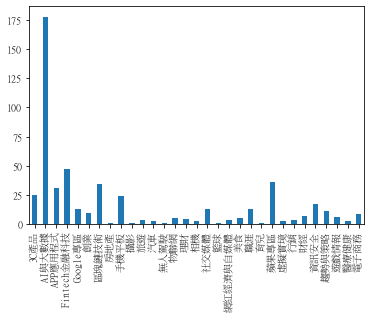

In [10]:
dict(news_list.groupby(['Classification']).count()['No.'])
grouped_news = pd.Series(dict(news_list.groupby(['Classification']).count()['No.']))
print(grouped_news)
grouped_news.plot.bar()


# ÈÄ≤ÈöéÁõÆÊ®ô  
## Target 1  
Áà¨‰∏ã‚ΩÇÁ´†ÔºåÈÄèÈÅé  <font color=blue>jieba</font> Á≠âÊñ∑Ë©ûÂ∞á‚ΩÇÊñáÁ´†ÊãÜËß£  


In [11]:
import jieba

Refer to:  

https://github.com/fxsjy/jieba  
  
https://github.com/ldkrsi/jieba-zh_TW  
  
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/32296/  

In [12]:
# use article #001.txt as example

# column #0: item No. 001 ~ 500
# column #1: subject, title
# column #2: url
# column #3: classification
# column #4: brief

dir = "articles"
filename = "001.txt"
subject = news_list.values[0][1]
print(f"Title: {subject}\n")

with open(dir + "/" + filename, 'r', encoding = "utf-8") as f:
    content = f.read()

word_seg = jieba.cut(content, cut_all = False)

word_list = []
for word in word_seg:
    word_list.append(word)
print(word_list)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tw4690\AppData\Local\Temp\jieba.cache


Title: Ê∑∫Ë´áÂÄãÊÄßÂåñÊé®Ëñ¶Á≥ªÁµ±‰∏≠ÁöÑÈùûÊé°Ê®£Â≠∏Áøí | Ê©üÂô®‰πãÂøÉ



Loading model cost 0.843 seconds.
Prefix dict has been built succesfully.


['ÈöèÁùÄ', '‰∫íËÅîÁΩë', 'ÊäÄÊúØ', 'Âíå', '‰∫ß‰∏ö', 'ÁöÑ', 'ËøÖÈÄü', 'ÂèëÂ±ï', 'Ôºå', 'Êé®Ëçê', 'Á≥ªÁªü', 'Ôºà', 'Recommender', ' ', 'System', 'Ôºâ', 'Êàê‰∏∫', 'ÁΩëÁªúÂ∫îÁî®', '‰∏≠', '‰∏çÂèØ', 'Áº∫Â∞ë', 'ÁöÑ', 'ÈáçË¶Å', 'ÁªÑÊàêÈÉ®ÂàÜ', 'Ôºå', 'ÊòØ', 'ÂΩìÂâç', 'Ëß£ÂÜ≥', '‰ø°ÊÅØ', 'ËøáËΩΩ', 'ÈóÆÈ¢ò', 'ÁöÑ', 'ÊúÄ', 'ÊúâÊïà', 'ÁöÑ', 'ÊñπÊ≥ï', '‰πã‰∏Ä', 'Ôºå', 'Âõ†Ê≠§', '‰πü', 'ÂèóÂà∞', '‰∫Ü', 'Â≠¶Áïå', 'Âíå', 'Â∑•‰∏öÁïå', 'ÁöÑ', 'ÂπøÊ≥õ', 'ÂÖ≥Ê≥®', '„ÄÇ', '\n', 'ËøëÂπ¥Êù•', 'Ôºå', 'Ê∑±Â∫¶', 'Â≠¶‰π†', 'ÊäÄÊúØ', 'Âú®', 'ËÆ∏Â§ö', 'È¢ÜÂüü', 'Â±ïÁé∞Âá∫', 'ÈùûÂá°', 'ÁöÑ', 'Â∫îÁî®', 'ÊïàÊûú', '„ÄÇ', 'ÁÑ∂ËÄå', 'Ôºå', 'Áé∞Êúâ', 'ÁöÑ', 'Â∞Ü', 'Ê∑±Â∫¶', 'Â≠¶‰π†', 'Â∫îÁî®', 'Âà∞', 'Êé®Ëçê', 'Á≥ªÁªü', '‰ªªÂä°', 'ÁöÑ', 'Â∑•‰Ωú', '‰∏ªË¶Å', 'ÈõÜ‰∏≠', 'Âú®', 'Êé¢Á¥¢', 'Âíå', 'ÂºïÂÖ•', '‰∏çÂêå', 'ÁöÑ', 'Á•ûÁªèÁΩëÁªú', 'Ê°ÜÊû∂', 'Ôºå', 'Âú®', 'Ê®°Âûã', 'Â≠¶‰π†', 'ÁÆóÊ≥ï', 'ÊñπÈù¢', 'ÁöÑ', 'Á†îÁ©∂', 'Áõ∏ÂØπ', 'ËæÉ', 'Â∞ë', '„ÄÇ', '\n', '‰∏∫‰∫Ü', '‰ºòÂåñ', 'Ê®°Âûã', 'Ôºå', 'Áé∞Êúâ', 'ÁöÑ', 'Â∑•‰Ωú', 'ÂæÄÂæÄ', '

## Target 2  
ÂèØ‰ª•Á∞°ÂñÆÁöÑË®àÁÆóÂêåÊ®£ÊñáÂ≠óÂá∫ÁèæÁöÑÈ†ªÁéáÊàñÊòØÈÄèÈÅé TFIDF ÁöÑÁµ±Ë®à‚ΩÖÊñπÂºèË®àÁÆó  


In [13]:
word_series = pd.Series(word_list)
word_series.value_counts()

ÁöÑ                126
Ôºå                 81
                  73
„ÄÇ                 53
Ôºâ                 40
Ôºà                 40
\n                38
Â≠¶‰π†                32
ÊòØ                 32
Âú®                 23
Âíå                 22
Êé®Ëçê                22
Ê®°Âûã                19
‰∏≠                 17
Á•ûÁªèÁΩëÁªú              15
Á≥ªÁªü                14
Êó∂Èó¥                13
ËÆ≠ÁªÉ                13
Â∫îÁî®                12
ÁÆóÊ≥ï                12
‰ªªÂä°                11
Âü∫‰∫é                11
Ôºö                 11
‰∫Ü                 10
„ÄÅ                 10
‰∏Ä‰∏™                10
Ê∑±Â∫¶                 9
ÂèØ‰ª•                 9
‰ª•‰∏ä                 8
‰ø°ÊÅØ                 8
                ... 
50                 1
ÂáÜÁ°ÆÊÄß                1
Á≤óÁï•Âú∞                1
rating             1
Ëøë‰∏§Âπ¥                1
matrix             1
ÁõÆÁöÑ                 1
‰∏ã                  1
ËØ≠Ë®Ä                 1
ÂÖ∑Êúâ                 1
ÂèØËØªÊÄß      

## Target 3  
Â∞áÁ∂ìÂ∏∏Âá∫ÁèæÁöÑ stop words ÈÅéÊøæÊéâ‰πãÂæåÂ∞çÈ†ªÁéáÈÄ≤‚æèË°åÔ®àÊéíÂêç  


refer to:  
https://github.com/tomlinNTUB/Python-in-5-days/blob/master/10-2%20%E4%B8%AD%E6%96%87%E6%96%B7%E8%A9%9E-%E7%A7%BB%E9%99%A4%E5%81%9C%E7%94%A8%E8%A9%9E.md  


In [14]:
# initialize the lists
stopWords=[]
segments=[]
remainderWords=[]
word_list = []

# read the StopWords.txt
with open('stopWords.txt', 'r', encoding='utf-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

# read the file to be segmented then segment it
with open(dir + "/" + filename, 'r', encoding = "utf-8") as file:
    content = file.read()
    
segments = jieba.cut(content, cut_all=False)

remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', segments))
for word in remainderWords:
    word_list.append(word)
print(word_list)

# convert word_list to Pandas.Series
word_series = pd.Series(word_list)
word_series.value_counts()


['ÈöèÁùÄ', '‰∫íËÅîÁΩë', 'ÊäÄÊúØ', '‰∫ß‰∏ö', 'ËøÖÈÄü', 'ÂèëÂ±ï', 'Êé®Ëçê', 'Á≥ªÁªü', 'Recommender', ' ', 'System', 'Êàê‰∏∫', 'ÁΩëÁªúÂ∫îÁî®', '‰∏≠', '‰∏çÂèØ', 'Áº∫Â∞ë', 'ÈáçË¶Å', 'ÁªÑÊàêÈÉ®ÂàÜ', 'ÂΩìÂâç', 'Ëß£ÂÜ≥', '‰ø°ÊÅØ', 'ËøáËΩΩ', 'ÈóÆÈ¢ò', 'ÊúâÊïà', 'ÊñπÊ≥ï', 'Â≠¶Áïå', 'Â∑•‰∏öÁïå', 'ÂπøÊ≥õ', 'ÂÖ≥Ê≥®', 'ËøëÂπ¥Êù•', 'Ê∑±Â∫¶', 'Â≠¶‰π†', 'ÊäÄÊúØ', 'ËÆ∏Â§ö', 'È¢ÜÂüü', 'Â±ïÁé∞Âá∫', 'ÈùûÂá°', 'Â∫îÁî®', 'ÊïàÊûú', 'Áé∞Êúâ', 'Â∞Ü', 'Ê∑±Â∫¶', 'Â≠¶‰π†', 'Â∫îÁî®', 'Êé®Ëçê', 'Á≥ªÁªü', '‰ªªÂä°', 'Â∑•‰Ωú', '‰∏ªË¶Å', 'ÈõÜ‰∏≠', 'Êé¢Á¥¢', 'ÂºïÂÖ•', '‰∏çÂêå', 'Á•ûÁªèÁΩëÁªú', 'Ê°ÜÊû∂', 'Ê®°Âûã', 'Â≠¶‰π†', 'ÁÆóÊ≥ï', 'ÊñπÈù¢', 'Á†îÁ©∂', 'Áõ∏ÂØπ', 'ËæÉ', 'Â∞ë', '‰∏∫‰∫Ü', '‰ºòÂåñ', 'Ê®°Âûã', 'Áé∞Êúâ', 'Â∑•‰Ωú', 'ÂæÄÂæÄ', '‰ΩøÁî®', 'Ë¥ü', 'ÈááÊ†∑', 'Á≠ñÁï•', 'Negative', ' ', 'Sampling', 'ËøõË°å', 'ËÆ≠ÁªÉ', 'ËôΩÁÑ∂', 'Ë¥ü', 'ÈááÊ†∑', 'Êñπ‰æø', 'Âπ∂‰∏î', 'Êòì‰∫é', 'ÂÆûÁé∞', 'ËÆ∏Â§ö', 'ÊúÄËøë', 'Á†îÁ©∂', 'Ë°®Êòé', 'Ë¥ü', 'ÈááÊ†∑', 'Á≠ñÁï•', 'È≤ÅÊ£íÊÄß', 'ËæÉÂ∑Æ', 'ÂèØËÉΩ', '‰ºö', 'ÂøΩÁï•', 'Êéâ', 'ÈáçË¶Å', 'ËÆ≠

                 73
Â≠¶‰π†               32
Êé®Ëçê               22
Ê®°Âûã               19
‰∏≠                17
Á•ûÁªèÁΩëÁªú             15
Á≥ªÁªü               14
ËÆ≠ÁªÉ               13
Êó∂Èó¥               13
Â∫îÁî®               12
ÁÆóÊ≥ï               12
‰ªªÂä°               11
Âü∫‰∫é               11
‰∏Ä‰∏™               10
Ê∑±Â∫¶                9
‰ø°ÊÅØ                8
Êú∫Âô®                8
‰∏∫                 7
ÊïàÊûú                7
-                 7
‰∏ÄÁßç                7
È¢ÜÂüü                7
Êù•                 7
ÈááÊ†∑                6
‰∏ªË¶Å                6
‰ΩøÁî®                6
.                 6
ËøáÊª§                6
Êï∞ÊçÆ                6
ÂèØËÉΩ                6
                 ..
Áé∞ÂÆû                1
ÂÆåÊàê                1
ÂàùÂßã                1
Âª∫Á´ã                1
Á±ªÊØî                1
Êó∂ÂÄô                1
‰∫∫Á±ª                1
ÁßëÊäÄ                1
Ê∏ÖÂçéÂ§ßÂ≠¶              1
Connectionist     1
Á©∫Èó¥                1
ÊêúÁ¥¢ÂºïÊ

## Target 4  
Â∞áÁµêÊûúÈÄèÈÅé wordcloud ÊñáÂ≠óÈõ≤ÁöÑÊñπÂºèÂëàÁèæ  


refer to:  
https://www.itread01.com/content/1532260931.html  
  
https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01  


ÈöèÁùÄ ‰∫íËÅîÁΩë ÊäÄÊúØ ‰∫ß‰∏ö ËøÖÈÄü ÂèëÂ±ï Êé®Ëçê Á≥ªÁªü Recommender   System Êàê‰∏∫ ÁΩëÁªúÂ∫îÁî® ‰∏≠ ‰∏çÂèØ Áº∫Â∞ë ÈáçË¶Å ÁªÑÊàêÈÉ®ÂàÜ ÂΩìÂâç Ëß£ÂÜ≥ ‰ø°ÊÅØ ËøáËΩΩ ÈóÆÈ¢ò ÊúâÊïà ÊñπÊ≥ï Â≠¶Áïå Â∑•‰∏öÁïå ÂπøÊ≥õ ÂÖ≥Ê≥® ËøëÂπ¥Êù• Ê∑±Â∫¶ Â≠¶‰π† ÊäÄÊúØ ËÆ∏Â§ö È¢ÜÂüü Â±ïÁé∞Âá∫ ÈùûÂá° Â∫îÁî® ÊïàÊûú Áé∞Êúâ Â∞Ü Ê∑±Â∫¶ Â≠¶‰π† Â∫îÁî® Êé®Ëçê Á≥ªÁªü ‰ªªÂä° Â∑•‰Ωú ‰∏ªË¶Å ÈõÜ‰∏≠ Êé¢Á¥¢ ÂºïÂÖ• ‰∏çÂêå Á•ûÁªèÁΩëÁªú Ê°ÜÊû∂ Ê®°Âûã Â≠¶‰π† ÁÆóÊ≥ï ÊñπÈù¢ Á†îÁ©∂ Áõ∏ÂØπ ËæÉ Â∞ë ‰∏∫‰∫Ü ‰ºòÂåñ Ê®°Âûã Áé∞Êúâ Â∑•‰Ωú ÂæÄÂæÄ ‰ΩøÁî® Ë¥ü ÈááÊ†∑ Á≠ñÁï• Negative   Sampling ËøõË°å ËÆ≠ÁªÉ ËôΩÁÑ∂ Ë¥ü ÈááÊ†∑ Êñπ‰æø Âπ∂‰∏î Êòì‰∫é ÂÆûÁé∞ ËÆ∏Â§ö ÊúÄËøë Á†îÁ©∂ Ë°®Êòé Ë¥ü ÈááÊ†∑ Á≠ñÁï• È≤ÅÊ£íÊÄß ËæÉÂ∑Æ ÂèØËÉΩ ‰ºö ÂøΩÁï• Êéâ ÈáçË¶Å ËÆ≠ÁªÉ Ê†∑ ‰æã ‰ªéËÄå ÂØºËá¥ Ê®°Âûã Êó†Ê≥ï Êî∂Êïõ ÊúÄ‰ºò Áä∂ÊÄÅ Ëøë‰∏§Âπ¥ Ê∏ÖÂçéÂ§ßÂ≠¶ ‰ø°ÊÅØÊ£ÄÁ¥¢ ËØæÈ¢òÁªÑ THUIR È¶ñÊ¨° Êé¢Á¥¢ Â∞Ü Èùû ÈááÊ†∑ Á≠ñÁï• Non - Sampling ,   Whole - data   based   Learning Â∫îÁî® Âü∫‰∫é Á•ûÁªèÁΩëÁªú Êé®Ëçê Á≥ªÁªü ‰∏≠ ÈÄöËøá ‰∏•Ê†º Êï∞Â≠¶ Êé®ÁêÜ Êàë‰ª¨ ËÆæËÆ° ‰∏ÄÁ≥ªÂàó È´

(-0.5, 399.5, 199.5, -0.5)

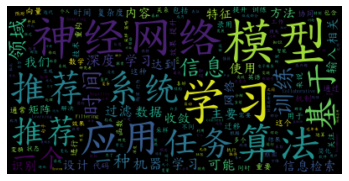

In [15]:
#from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

font_path = 'C:\Windows\Fonts/KAIU.TTF' # Ê®ôÊ•∑È´î

wc = WordCloud(
  background_color = 'black',        #   ËÉåÊôØÈ°èËâ≤
  max_words = 200,                   #   ÊúÄÂ§ßÂàÜË©ûÊï∏Èáè
  mask = None,                       #   ËÉåÊôØÂúñÁâá
  max_font_size = None,              #   È°ØÁ§∫Â≠óÈ´îÁöÑÊúÄÂ§ßÂÄº
  stopwords = STOPWORDS.add(word),   #   ‰ΩøÁî®ÂÖßÁΩÆÁöÑÂ±èËîΩË©ûÔºåÂÜçÊ∑ªÂä†‰∏ÄÂÄã
  font_path = font_path,             #   Ëã•ÁÇ∫‰∏≠ÊñáÂâáÈúÄÂºïÂÖ•‰∏≠ÊñáÂ≠óÂûã(.TTF)
  random_state = None,               #   Èö®Ê©üÁ¢ºÁîüÊàêÂêÑÂàÜË©ûÈ°èËâ≤
  prefer_horizontal = 0.9)           #   Ë™øÊï¥ÂàÜË©û‰∏≠Ê∞¥Âπ≥ÂíåÂûÇÁõ¥ÁöÑÊØî‰æã

# segmented words string
wordsString = " ".join(word_list)
print(wordsString)
# Generate a word cloud image
wordcloud = wc.generate(wordsString)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
